In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
#les bibliothèques
from skimage import io
from random import sample
from mpl_toolkits.mplot3d import Axes3D
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image



(731, 871, 3)


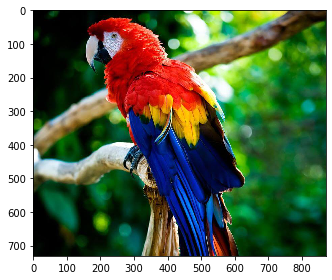

In [130]:
img =image = Image.open("/content/drive/Shareddrives/Projets ING3 IA 2021-2022/imgPerr.jpg")
image = io.imread("/content/drive/Shareddrives/Projets ING3 IA 2021-2022/imgPerr.jpg")
io.imshow(image)
print(image.shape)

In [82]:
#affichage des histogrammes
def afficher_histogramme(img, nb_pixel_a_afficher):
  width = img.size[0] 
  height = img.size[1]
  RGB = []

  for y in range(0, height):
      row = ""
      for x in range(0, width):
          RGB.append(img.getpixel((x,y)))

  # on cree une liste de nb_pixel_a_afficher aleatoire à afficher
  liste_point = sample(RGB, nb_pixel_a_afficher)

  fig = plt.figure()
  ax = Axes3D(fig)

  ax.set_xlabel('R')
  ax.set_ylabel('G')
  ax.set_zlabel('B')
  fig.add_axes(ax)

  for i in range(len(liste_point)):
      pixel_col = '#%02x%02x%02x' % liste_point[i]
      ax.scatter(liste_point[i][0], liste_point[i][1], liste_point[i][2], c = pixel_col)
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


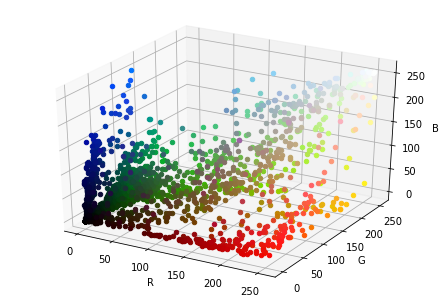

In [104]:
afficher_histogramme(img, 2000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


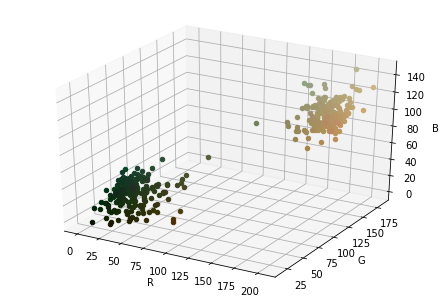

In [94]:
afficher_histogramme(Image.open("data/imgK2.jpg"), 2000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


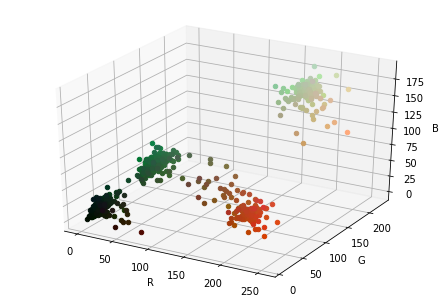

In [95]:
afficher_histogramme(Image.open("data/imgK4.jpg"), 2000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


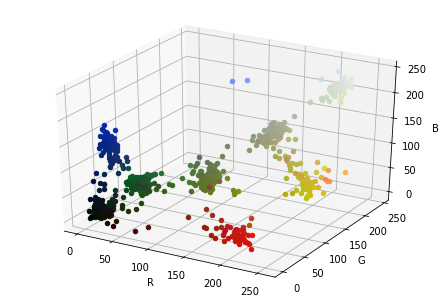

In [96]:
afficher_histogramme(Image.open("data/imgK8.jpg"), 2000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


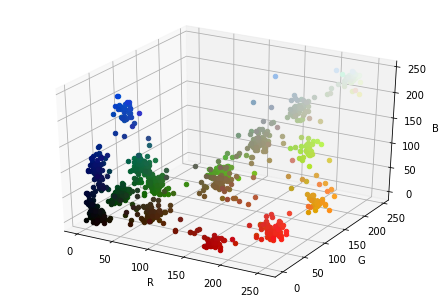

In [99]:
afficher_histogramme(Image.open("data/imgK16.jpg"), 2000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


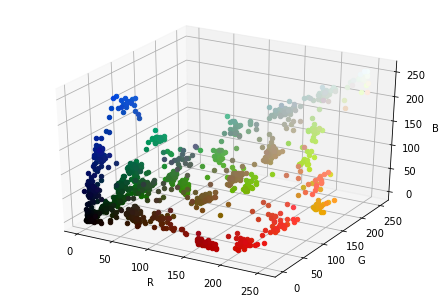

In [100]:
afficher_histogramme(Image.open("data/imgK32.jpg"), 2000)


In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Kmeans_Image_segmentation(img, K):
  
  # on transforme l'image en un vecteur d'une seule dimension
  vectorized = img.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
 
  attempts=10
  ret,label,center = cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image


def afficher_resultat(img, K1, K2, K3, K4, K5):
  figure_size = (20,15)
  plt.figure(figsize=figure_size)
  plt.subplot(2,3,1),plt.imshow(img)
  plt.subplot(2,3,2),plt.imshow(Kmeans_Image_segmentation(image,K1))
  
  plt.subplot(2,3,3),plt.imshow(Kmeans_Image_segmentation(image,K2))
  plt.subplot(2,3,4),plt.imshow(Kmeans_Image_segmentation(image,K3))
  plt.subplot(2,3,5),plt.imshow(Kmeans_Image_segmentation(image,K4))

  plt.subplot(2,3,6),plt.imshow(Kmeans_Image_segmentation(image,K5))

  plt.show()


def enregister_image_segmentee():
    io.imsave('data/imgK2.jpg',Kmeans_Image_segmentation(image,2))
    io.imsave('data/imgK4.jpg',Kmeans_Image_segmentation(image,4))
    io.imsave('data/imgK8.jpg',Kmeans_Image_segmentation(image,8))
    io.imsave('data/imgK16.jpg',Kmeans_Image_segmentation(image,16))
    io.imsave('data/imgK32.jpg',Kmeans_Image_segmentation(image,32))



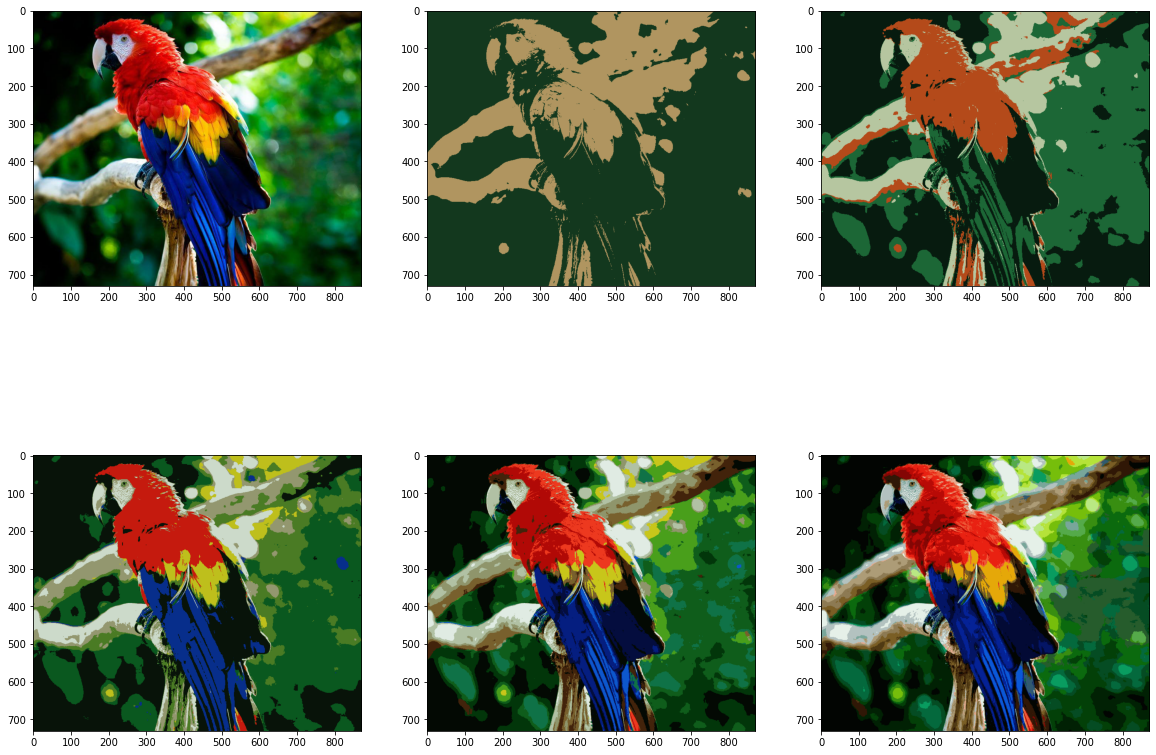

In [128]:
afficher_resultat(image, 2, 4, 8, 16, 32)